In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
import logging
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
summary_handler = logging.FileHandler('./summary.log')
summary_handler.setLevel(logging.DEBUG)
summary_handler.setFormatter(formatter)
handler = logging.FileHandler('./logging.log')
handler.setLevel(logging.INFO)
handler.setFormatter(formatter)

logger = logging.getLogger()
logger.setLevel(logging.NOTSET)
logger.addHandler(handler)

In [4]:
from classifiers.quantum.qasvm import QASVM
from classifiers.quantum import Qasvm_Mapping_4x2
from classifiers.optimizer import MySPSA
from classifiers.optimizer import SimplePMStorage
from qiskit.circuit.library import RealAmplitudes
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer import QasmSimulator
from qiskit.ignis.mitigation import CompleteMeasFitter
from qiskit import IBMQ


In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-kaist', group='internal', project='default')
backend = provider.get_backend('ibmq_toronto')
backend

__init__.discover_credentials:INFO:2021-03-21 15:49:00,420: Using credentials from qiskitrc
/home/quic/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>

In [6]:
X =np.array([[ 0.72294659, -1.00386432],
            [-0.60553577,  2.29966755],
            [-2.50699176, -1.03101898],
            [ 2.63961761,  2.21632328]])
y = np.array([0,0,1,1])
var_form = RealAmplitudes(2, reps=5)
storage = SimplePMStorage()
optimizer = MySPSA(maxiter=2**7, last_avg=2**4, callback=storage)
quantum_instance = QuantumInstance(backend=QasmSimulator.from_backend(backend), shots=2**13, seed_transpiler=0, measurement_error_mitigation_cls=CompleteMeasFitter, optimization_level=2, initial_layout=Qasvm_Mapping_4x2(backend).layout)
quantum_instance.backend_config['basis_gates'] = backend.configuration().basis_gates
qasvm = QASVM(X, y, var_form=var_form, optimizer=optimizer, quantum_instance=quantum_instance, C=1, k=0.1, option='Bloch_sphere').dual

In [7]:
print(qasvm.second_order_circuit.depth())
qasvm.second_order_circuit.draw(idle_wires=False, fold=-1)

92


global phase: -264.351353179266
              ┌────┐  ┌────────────────┐   ┌────┐  ┌───────┐     ┌───┐     ┌──────────┐┌────┐   ┌─────────┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ┌───┐                                                ┌───┐           ┌───┐                                                                                                                                                                   ░          
  i_0 -> 5 ───┤ √X ├──┤ RZ(θ_i[0] + π) ├───┤ √X ├──┤ RZ(π) ├──■──┤ X ├──■──┤ RZ(3π/2) ├┤ √X ├───┤ RZ(π/2) ├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤ X ├────────────────────────────────────────────────┤ X ├─────■─────┤ X ├──────■─────────────────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────────
              ├────┤  └────────────────┘   └────┘  └───────┘┌─┴─┐└─┬─┘┌─┴─┐└──────────┘├────┤┌──┴─────────┴───┐      ┌────┐      ┌───────┐         ┌────┐┌────────────────┐      ┌────┐      ┌───────┐         ┌────┐┌────────────────┐      ┌────┐      ┌───────┐         ┌────┐┌────────────────┐      ┌────┐      ┌───────┐         ┌────┐┌─────────────────┐       ┌────┐      ┌───────┐                     ┌───┐                                                                                  ┌───┐             ┌───┐  ┌────────┐  ┌────┐  ┌────────────┐    ┌────┐    ┌───┐ ┌─────────────┐     ┌───┐     ┌─────────────┐     ┌───┐     ┌───────────────┐      ┌───┐           ┌───┐                     └─┬─┘           ┌───┐     ┌───┐     ┌───┐            └─┬─┘   ┌─┴─┐   └─┬─┘    ┌─┴─┐    ┌───┐┌──────────┐┌─┴─┐┌─────────┐┌────┐┌──────────┐                                                                                                   ░    ┌─┐   
 yi_0 -> 8 ───┤ √X ├────────────────────────────────────────┤ X ├──■──┤ X ├─────■──────┤ √X ├┤ RZ(θ_i[2] + π) ├──────┤ √X ├──────┤ RZ(π) ├────■────┤ √X ├┤ RZ(θ_i[4] + π) ├──────┤ √X ├──────┤ RZ(π) ├────■────┤ √X ├┤ RZ(θ_i[6] + π) ├──────┤ √X ├──────┤ RZ(π) ├────■────┤ √X ├┤ RZ(θ_i[8] + π) ├──────┤ √X ├──────┤ RZ(π) ├────■────┤ √X ├┤ RZ(θ_i[10] + π) ├───────┤ √X ├──────┤ RZ(π) ├────■────────■───────┤ X ├─────────■───────────────────────■────────────────────────────────────────■───────┤ X ├───────■─────┤ X ├──┤ RZ(-π) ├──┤ √X ├──┤ RZ(3.1454) ├────┤ √X ├────┤ X ├─┤ RZ(0.62028) ├─────┤ X ├─────┤ RZ(-1.6377) ├─────┤ X ├─────┤ RZ(-0.014047) ├──────┤ X ├────────■──┤ X ├───────■───────────────■──────────■──┤ X ├──■──┤ X ├──■──┤ X ├─────■────────■─────┤ X ├─────■──────┤ X ├────┤ X ├┤ RZ(3π/2) ├┤ X ├┤ RZ(π/2) ├┤ √X ├┤ RZ(3π/2) ├───────────────────────────────────────────────────────────────────────────────────────────────────░────┤M├───
              ├────┤  ┌────────────────┐   ┌────┐  ┌───────┐└───┘     └───┘   ┌─┴─┐    ├────┤├────────────────┤      ├────┤      ├───────┤  ┌─┴─┐  ├────┤├────────────────┤      ├────┤      ├───────┤  ┌─┴─

In [8]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('ibmq_manhattan') from IBMQ(hub='ibm-q-kaist', group='internal', project='default')>,
 <IBMQBackend('

In [9]:
logging.getLogger(qasvm.__module__).addHandler(summary_handler)
logging.getLogger(qasvm.optimizer.__module__).addHandler(summary_handler)
logging.getLogger(qasvm.circuit_class.__module__).addHandler(summary_handler)

qasvm.run()

{'optimizer_evals': None,
 'optimizer_time': 161.24667024612427,
 'optimal_value': 0.16086641614774866,
 'optimal_point': array([-1.6613095 ,  0.32125505, -2.06281988, -1.5900595 ,  1.52728769,
        -0.06483956, -1.86397497,  3.76076819,  2.43767891, -3.48683934,
         1.29296122,  2.48297233]),
 'optimal_parameters': {Parameter(θ[0]): -1.6613094980656324,
  Parameter(θ[1]): 0.3212550534892934,
  Parameter(θ[2]): -2.0628198809616918,
  Parameter(θ[3]): -1.5900595007803315,
  Parameter(θ[4]): 1.52728768631631,
  Parameter(θ[5]): -0.06483955566097756,
  Parameter(θ[6]): -1.8639749719076852,
  Parameter(θ[7]): 3.7607681900395242,
  Parameter(θ[8]): 2.4376789122062963,
  Parameter(θ[9]): -3.486839337683776,
  Parameter(θ[10]): 1.2929612154726082,
  Parameter(θ[11]): 2.4829723258832193}}

In [74]:
from classifiers.convex.svm import BinarySVM
from classifiers.kernel import Kernel
kernel = Kernel('SingleQubit')
svm = BinarySVM(kernel, C=None, k=0.1, mutation='REDUCED_QASVM')
logging.getLogger(svm.__module__).addHandler(handler)
svm.fit(X, y)
svm.accuracy(X, y)

1.0

In [11]:
import pathlib
import time
import uuid
prefix = time.strftime('%y%m%d-%H%M%S-', time.localtime(time.time()))+str(uuid.uuid4())
qasvm.save(pathlib.Path.home()/'QUIC-Projects'/'saved_model (.pkl)'/(prefix+'_qasvm.pkl'))
svm.save(pathlib.Path.home()/'QUIC-Projects'/'saved_model (.pkl)'/(prefix+'_svm.pkl'))
storage.save(pathlib.Path.home()/'QUIC-Projects'/'saved_model (.pkl)'/(prefix+'_storage.pkl'))

In [12]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [13]:
import numpy as np 
from matplotlib import pyplot as plt

In [14]:
from classifiers.utils import load_from_log
svm = load_from_log('./logging.log', 'BinarySVM')
qasvm = load_from_log('./logging.log', 'QASVM')
storage = load_from_log('./logging.log', 'SimplePMStorage')
# print(repr(svm), repr(qasvm), repr(storage.__dict__))

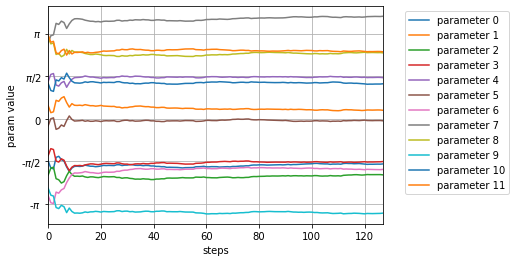

In [15]:
params = np.array(list(storage.params.values()))
steps = np.array(list(storage.params.keys()))
[plt.plot(steps, params[:,i], label=f'parameter {i}') for i in range(len(qasvm.var_form_params['0']))]
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([min(steps), max(steps)])
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['-$\pi$', '-$\pi/2$', '$0$', '$\pi/2$', '$\pi$'])
plt.xlabel('steps')
plt.ylabel('param value')
plt.grid()

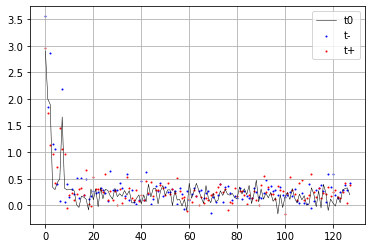

In [16]:
cost_pm = np.array(list(storage.costs_pm.values()))
cost = np.array(list(storage.costs.values()))
plt.scatter(steps[0:], cost_pm[0:][:,0], label='t-', c='b', s=1)
plt.scatter(steps[0:], cost_pm[0:][:,1], label='t+', c='r', s=1)
plt.plot(steps[0:], cost[0:], label='t0', c='k', linewidth=0.5)
plt.grid()
plt.legend()

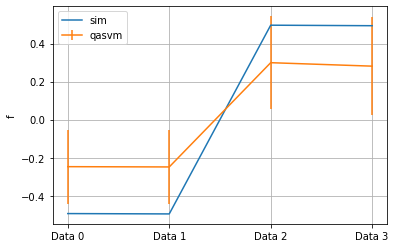

In [80]:
plt.plot(svm.f(svm.data), label='sim')
res = np.array([qasvm.f(qasvm.data) for _ in range(100)])
plt.errorbar(range(len(res.mean(axis=0))), res.mean(axis=0), yerr=2*res.std(axis=0), label='qasvm')
plt.xticks(range(4), [f'Data {i}' for i in range(4)])
plt.ylabel('f')
plt.legend()
plt.grid()

In [18]:
qasvm.var_form_params['0']

ParameterVector(name=θ, length=12)